# CS418 Data Pirates Final Report
1.Arsalan Babar 2.Imran Babar 3.Vraj Patel 4.Dilip Vemuri 5.Jason Yeoh

GitHub Repo for this notebook:
https://github.com/edgeslab/CS418-Project/blob/master/418_ProjectV3.ipynb

# DATA

## Data sets used: 

### Crimes in Chicago Since 2001:
Very large dataset. Required Cleaning. Only needed the data from the years 2008 to 2012. Fixed Structural Erros. Removed Unwanted Outliers. Wrote a python script for cleaning. <br>Python Script Filename(on github repo): datacleaning.py <br>Final Cleaned Data CSV Filename: DataFiltered.CSV

### Socioeconomic Data Set:
Not very large data set. Easy to utilize. Therefore, it did not require cleaning. Used the original csv file.<br>
Filename(on github repo): ChicagoSocioecon.csv

# ML/Stats
Use at least two machine learning or statistical analysis techniques to analyze your data, explain what you did, and talk about the inferences you uncovered.

## Machine Learning Analysis Using DECISION TREE REGRESSION
We are using the Chicago Socioeconomic Dataset to try and predict Per Capita Income (in US DOLLARS) in the Chiago Neighborhoods for each community area number based upon % of Housing Crowded, % Households below poverty, % aged 16+ unemployed, % Aged 25+ without highschool diploma,	% aged under 18 OR over 64. The two graphs below show the Visualization of the machine learning model built using Decision Tree Regression. It is pretty close to actual values, if you see closely. In short, this model is taking in to account all the socioeconmic factors and spitting out the values for per capita income which it believes should go with that specific neighborhood based on other socioeconomic data and then we can compare it to the actual values to see what the difference is and which neighborhoods have more than required per capita income or which neighborhoods are poorer than they should have been. This model is showing that some neigborhoods have more per capita income than what was expected and many have lower than what was expected. Thus, It is directly related to our hypothesis of economic polarization in Chicago.


### PREPROCESSING AND DESCRIBING THE DATA

In [18]:
import pandas as pd
from sklearn import linear_model
from  matplotlib import pyplot 
import numpy as np 
%matplotlib inline



Crimes= pd.read_csv('ChicagoSocioecon.csv') 
A = Crimes.drop('PER CAPITA INCOME ', axis=1)
A = Crimes.drop('COMMUNITY AREA NAME', axis=1)

X=A.drop(A.index[77])

B= Crimes['PER CAPITA INCOME ']
y= B.drop(B.index[77])

X.describe()

,Community Area Number,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,49.506494
std,22.371857,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,25.000000
50%,39.000000,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,50.000000
75%,58.000000,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


### ACTUAL VS PREDICTED DATA

It is showing the comparison between the predicted data from the trained data set and we can compare it to the actual to see the difference

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df.index+=1
df

,Actual,Predicted
49,17949,16444.0
75,27149,27751.0
60,22694,23040.0
55,22677,23040.0
35,23791,24454.0
27,12961,13781.0
69,17285,16563.0
34,16148,19252.0
46,16579,16563.0
70,23482,23472.0


### Model Statistics

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1666.875
Mean Squared Error: 18881397.875
Root Mean Squared Error: 4345.273049533251


##### The mean absolute error for our algorithm is 3955.5, which is less than 10 percent of the mean of all the values in the 'Per Capita Income' column. This means that our algorithm did a fine prediction job.

### DECISION TREE REGRESSION VISUALIZATION

Text(0, 0.5, 'Per Capita Income')

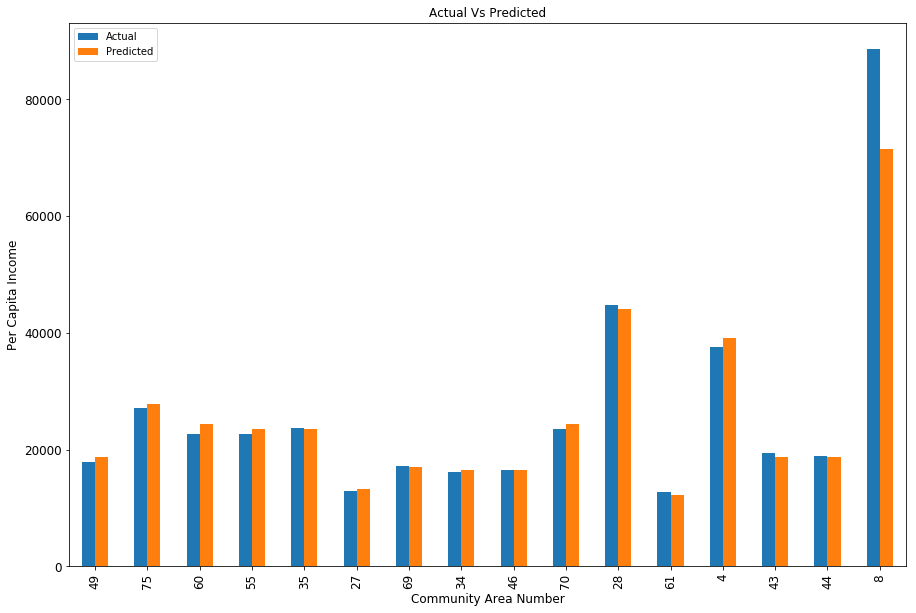

In [15]:
ax = df[['Actual','Predicted']].plot(kind='bar', title ="Actual Vs Predicted", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Area Number", fontsize=12)
ax.set_ylabel("Per Capita Income", fontsize=12)


# Visualization: 
Provide at least two distinct visualizations of your data or final results. This means two different techniques. If you use bar charts to analyze one aspect of your data, while you may use bar charts again, the second use will not count as a distinct visualization.

### Per Capita Income vs Crime Count Visualization
The visulization below proves that Per Capita Income and Crimes are indirectly related. Line Chart was used to represent this type of data because we wanted to see the correlation between Per Capita Income and Crime Count in Chicago and Line Chart below quite brilliantly depicts the indirect correlation between the two variable which are being compared. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
#import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


""""
# Collect X and Y
X = socioecon['PER CAPITA INCOME '].values.reshape(-1, 1)
y = arrest['Crime Count'].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create regression line
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
# mean_squared_error(y_test, y_pred)
var = r2_score(y_test, y_pred) 

print('Coefficient: ', reg.coef_)
print('Variance [R^2]: ', var)

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('Income v. Crime Count', size=20)
plt.xticks()
plt.yticks()
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Count')
"""

'"\n# Collect X and Y\nX = socioecon[\'PER CAPITA INCOME \'].values.reshape(-1, 1)\ny = arrest[\'Crime Count\'].values\n\n# Split the data into training/testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\n\n# Create regression line\nreg = LinearRegression().fit(X_train, y_train)\n\ny_pred = reg.predict(X_test)\n# mean_squared_error(y_test, y_pred)\nvar = r2_score(y_test, y_pred) \n\nprint(\'Coefficient: \', reg.coef_)\nprint(\'Variance [R^2]: \', var)\n\n# Plot outputs\nplt.scatter(X_test, y_test,  color=\'red\')\nplt.plot(X_test, y_pred, color=\'black\', linewidth=3)\nplt.title(\'Income v. Crime Count\', size=20)\nplt.xticks()\nplt.yticks()\nplt.xlabel(\'Per Capita Income\')\nplt.ylabel(\'Crime Count\')\n'

# VIZULIZATION 2



In [60]:
socioecon = pd.read_csv("ChicagoSocioecon.csv")
socioecon['Community Area Number'] = pd.to_numeric( socioecon['Community Area Number'], downcast='signed')
socioecon['Community Area Number'] = socioecon['Community Area Number'].fillna(0.0).apply(np.int64)
socioecon['HARDSHIP INDEX'] = socioecon['HARDSHIP INDEX'].fillna(0.0).apply(np.int64)
socioecon = socioecon.set_index('Community Area Number')
socioecon = socioecon.dropna()

crimes = pd.read_csv("dataFiltered.csv")
crimes['Year'] = crimes['Year'].fillna(0.0).apply(np.int64)
crime = crimes.groupby('Community Area').count()['ID'].reset_index(name="Crime Count")

combo = socioecon.join(crime,  lsuffix='_caller', rsuffix='_crimes')
totalCrime = combo['Crime Count'].sum()
combo



,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Community Area,Crime Count
Community Area Number,,,,,,,,,,
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,1.0,7748
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,2.0,6722
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,3.0,7271
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,4.0,3537
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,5.0,2945
6,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5,6.0,10771
7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2,7.0,7686
8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1,8.0,16708
9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8,9.0,499


Text(0.5, 1.0, 'Top 10 Communities by Percentage of Crime For all of Chicago')

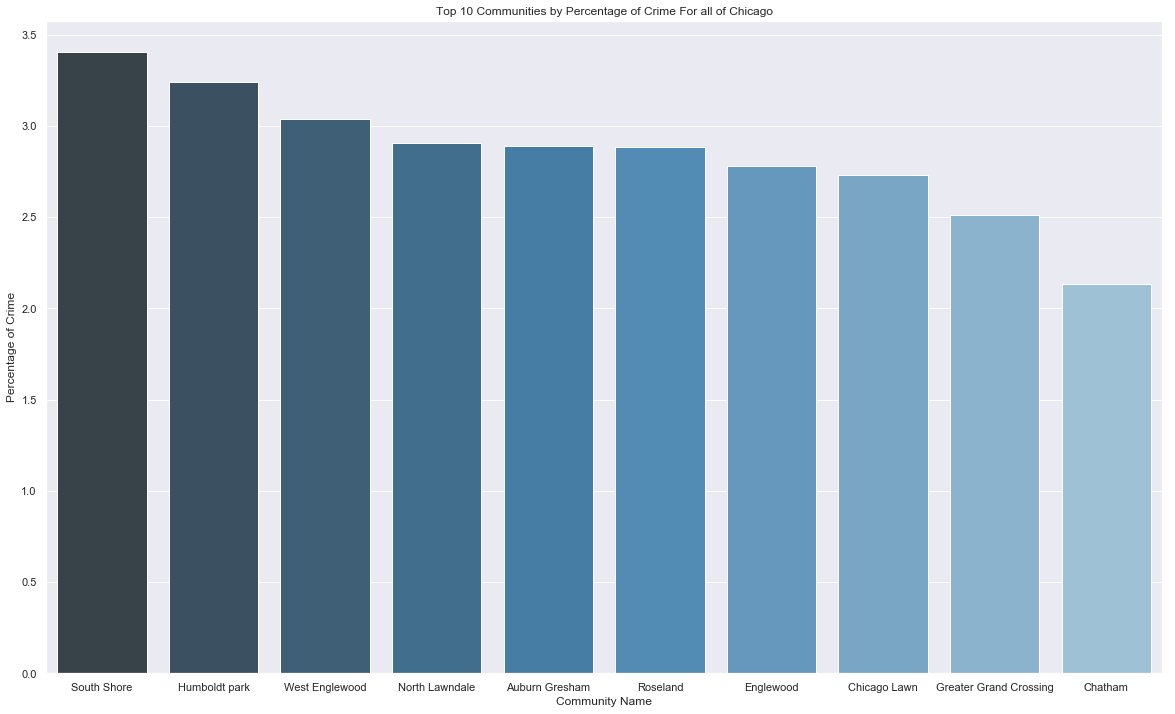

In [152]:
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(20,12)})
#sns.barplot(x=combo["Community Area"], y=combo["PERCENT HOUSEHOLDS BELOW POVERTY"], palette="deep")

#make a function to cagtegorize every area as low,mid,upper class
#plot percentage of crime responsible for this data

def percent_crime(row):
    x = row['Crime Count']
    return (float( x / totalCrime)*100)
combo['PERCENTAGE CRIME'] = combo.apply (lambda row: percent_crime(row), axis=1)

combo2 = combo.drop([25])
top10 = combo2.nlargest(10, 'PERCENTAGE CRIME')
pcrime = sns.barplot(x=top10["COMMUNITY AREA NAME"], y=top10["PERCENTAGE CRIME"], palette='Blues_d')
pcrime.set_xlabel("Community Name")
pcrime.set_ylabel("Percentage of Crime")
pcrime.set_title("Top 10 Communities by Percentage of Crime For all of Chicago")


23.509999999999998


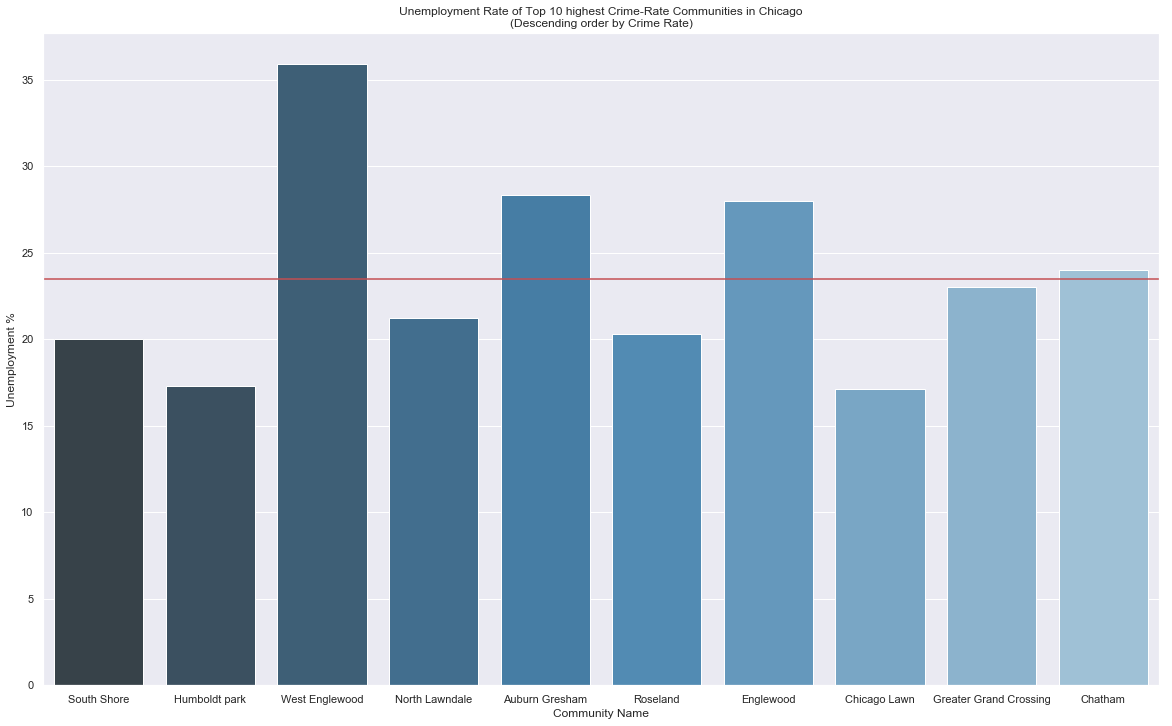

In [187]:
s =sns.barplot(x=top10["COMMUNITY AREA NAME"], y=top10["PERCENT AGED 16+ UNEMPLOYED"], palette='Blues_d')
s.set(xlabel="Community Name", ylabel='Unemployment %')
s.set_title('Unemployment Rate of Top 10 highest Crime-Rate Communities in Chicago'
            '\n(Descending order by Crime Rate)')
s.axhline(23.5, COLOR='R')
print(top10["PERCENT AGED 16+ UNEMPLOYED"].mean())

Conclusions from comparing these two bar plots:
    From comparing these two bar plots, we can see that in the neighborhoods with the top 10 crime rates in chicago (austin was removed because it accounts for ~6.5% of all crime in chicago, more than double the second highest, and is a glaring outlier), they all hover around a similar unemployment rate. The average unemployment rate for these top 10 is %23.5 and as you can see from the graph, there is very little deviation from this number for these neighborhoods. Intuition would say that obviously neighborhoods with high unemployment rate would have a lot of crime, since there a lot of (usually young men) out of work and more willing to take risks and turn to crime. While this data is not hard evidence of such a relationship, It does show there is a definite pattern beteween the two. High unemployment rate is a feature of lower-class communites, and it is a symptom of the middle class disappearing. Most of the good jobs in Chicago are not going to the citizens who live there it would seem. 

# Additional work
In addition to the requirements in the ML and visualization sections above, we would like to see at least one extra from either category. That means a total of five deliverables.


# Results STILL NEED TO UPDATE THIS SECTION
Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.

After doing a bit of data analysis, a key insight we have found is that middle class is actually disappearing. After looking at the per capita income visualization per community from above, we have noted that communities with low income have higher crime counts. Thus, we believe that per capita income has major effects on crime rate in chicago. This is a very imporatant insight in this project. Another insight, we have understood is that not having a highschool diploma also has impacts on crime counts. After closely analyzing the "Highschool Education in Each Community" visualization and comparing it against "Crime count per Chicago Community Area" visualization, we analyzed that communities with higher high school dropouts have higher crime counts. Its a direct relationship.This was another very interesting insight.
There are few concrete result we can show at this point. Based on our data analysis and viusalizations above, we can conclude the following:
As per capita income goes up the crime count decreases.(per community)
As unemployment rate goes up the crime count increases.(per community)
As high drop out rate increases, the crime count increases.(per community)
We are currently using these three factors to predict for each community whether, the crime rate will increase or decrease in the future. We are taking advantage of linear regression.
